<a href="https://colab.research.google.com/github/kevin980526/homework_textmining/blob/main/Frequency%26Collocation_Analysis_202324292%EA%B9%80%EB%8F%99%EA%B1%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequency Analysis

In [2]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [1]:
# !pip install ujson

In [3]:

import ujson
from collections import Counter

CHK_POSES = {"NNG", "NNP"}

INPUT_FILE_NAME = "mayor_news_morph.jsonl"

titles = []
mayors = []
body=[]
word_lists = []

mayor_idxes = {}

with open(INPUT_FILE_NAME, 'r', encoding='utf-8') as input_file:
    for idx, line in enumerate(input_file):
        data = ujson.loads(line)

        titles.append(data['title'])
        mayors.append(data['mayor'])
        body.append(data['body'])

        words = []
        for sent_morph in data['body_ma']:
            words.extend([lex for lex, pos in sent_morph if pos in CHK_POSES])
        word_lists.append(words)

        mayor_idxes.update({data['mayor']: idx})

news = {
    "title": titles,
    "body":body,
    "mayor": mayors,
    "words": word_lists
}

import pandas as pd
pd.DataFrame(news).head(10)

,title,body,mayor,words
0,서울시 '건강도시' 지표 개발,서울시가 시민 건강을 고려한 정책 수립을 위해 '건강도시 지표'를 개발하기로 했다....,오세훈,"[서울시, 시민, 건강, 고려, 정책, 수립, 건강, 도시, 지표, 개발, 서울시,..."
1,숲과 강이 함께하는 복합 주거도시 조성,"26개 재개발지역 종합지원, 업무처리 단순화로 효율 높여 \n\n내년 왕십리민자역사...",오세훈,"[개발, 지역, 종합, 지원, 업무, 처리, 효율, 내년, 왕십리, 민자역사, 완공..."
2,[우리구 구청장 궁금하시죠] 최선길 도봉구청장,최선길 도봉구청장의 ‘표현색’은 녹색이다. 도봉구는 천혜의 자연환경을 갖추고 있다....,오세훈,"[최선, 길, 도봉구청, 장의, 표현, 색, 녹색, 도봉구, 천혜, 자연환경, 최,..."
3,<기고>시민을 위한 건강도시 만들기,우리나라 국민이면 누구나 자신이 거주하는 도시와 지역에서 건 \n\n강하게 살기를 ...,오세훈,"[우리나라, 국민, 자신, 거주, 도시, 지역, 건강, 도시, 지역, 주민, 삶의 ..."
4,"오세훈 서울시장 ""남산ㆍ청계천ㆍ한강 서울의 랜드마크로""","""사람들이 자주 찾는 순환도로에 밟으면 푹신한 우레탄을 깔아 산책하기 쉽도록 하겠다...",오세훈,"[사람, 순환도로, 우레탄, 산책, 오세훈, 서울, 시장, 운동복, 차림, 매일, ..."
5,서울시 시민건강 향상 팔걷었다,서울시는 11일 시민들의 건강향상을 위해 최근 학교와 직장 등 생활영역별 건강증진 ...,오세훈,"[서울시, 시민, 건강, 향상, 최근, 학교, 직장, 생활, 영역, 건강증진, 모델..."
6,서울 건강프로젝트 2010년까지 區별로 추진,서울시가 자치구마다 학교·직장 등 생활 영역별로 건강 증진 모\n\n델을 마련해 추...,오세훈,"[서울시, 자치구, 학교, 직장, 생활, 영역, 건강, 증진, 을, 마련, 추진, ..."
7,“서울을 건강 도시로 만들자”,"]“건강한 학교, 건강한 직장을 함께 만들어요.”\n\n서울시와 25개 자치단체가 ...",오세훈,"[건강, 학교, 건강, 직장, 서울시, 자치, 단체, 학교, 직장, 생활, 터전, ..."
8,"양재천 복원, WHO ‘모범사례’ 선정",서울 양재천 복원이 유엔 세계보건기구(WHO)에서 건강도시 변신 \n\n의 모범사례...,오세훈,"[서울, 양재천, 복원, 유엔, 세계보건기구, 건강, 도시, 변신, 의, 모범, 사..."
9,16~19일 하이서울 2006 건강도시엑스포,서울시는 오는 16일부터 19일까지 4일간 서울무역전시컨벤션센터에서 '하이서울 20...,오세훈,"[서울시, 서울무역전시컨벤션센터, 하이, 서울, 건강, 도시, 엑스포, 개최, 이번..."


In [3]:
# !pip install pandas

In [5]:
word_sets = [set(e) for e in news["words"]]
word_counts = [Counter(e) for e in news["words"]]

for mayor in ["오세훈","이명박", "박원순"]:
    print("* {}: \n{}".format(
        mayor,
        word_counts[mayor_idxes[mayor]].most_common(20)
    ))
    print()

* 오세훈: 
[('외국인', 10), ('환자', 10), ('강남구', 9), ('의료관광', 9), ('의료', 8), ('유치', 7), ('중국', 5), ('관광객', 4), ('러시아', 4), ('기관', 3), ('활성', 3), ('마케팅', 3), ('홍보', 3), ('발표', 2), ('실적', 2), ('지난해', 2), ('전국', 2), ('증가', 2), ('성과', 2), ('국가', 2)]

* 이명박: 
[('마라톤', 16), ('서울', 13), ('대회', 11), ('세계', 6), ('말', 6), ('국제', 5), ('달리기', 5), ('청장', 5), ('선수', 4), ('시장', 4), ('청계천', 4), ('시민', 4), ('건강', 3), ('안전', 3), ('시간', 2), ('사진', 2), ('동아', 2), ('행사', 2), ('계획', 2), ('이번', 2)]

* 박원순: 
[('도시', 9), ('건강', 4), ('계획', 4), ('안전', 3), ('아동', 3), ('친화', 3), ('조성', 3), ('사업', 3), ('어린이집', 3), ('김영종', 2), ('역점', 2), ('구청장', 2), ('추진', 2), ('종로', 2), ('교육', 2), ('아이', 2), ('환경', 2), ('행복', 2), ('사회', 2), ('지원', 2)]



WordCloud

In [5]:
# !pip install wordcloud

In [6]:
# !pip install matplotlib

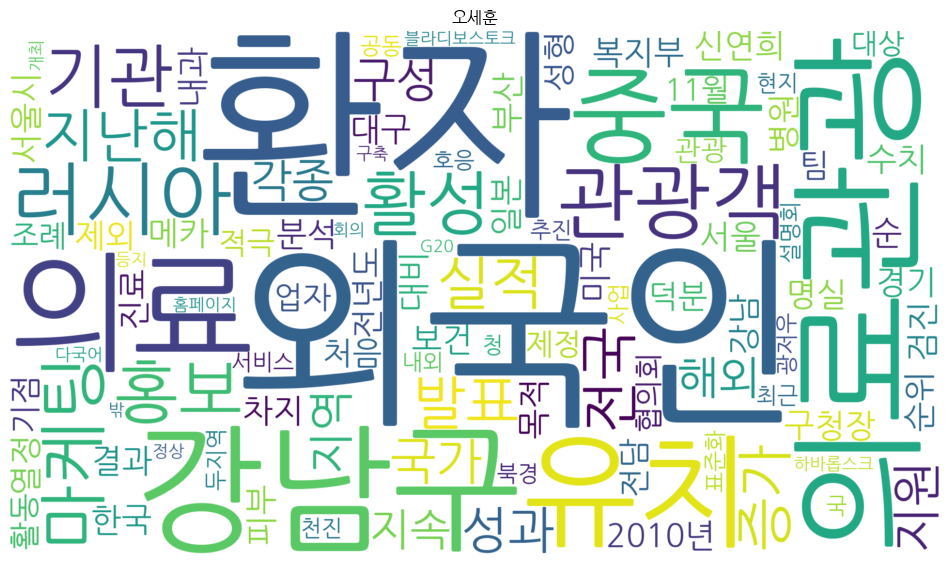

In [7]:

import wordcloud
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc("font", family='NanumGothic')
N_WORDS = 100

wc = wordcloud.WordCloud(background_color="white", font_path = 'NanumGothic.ttf', max_words = N_WORDS, collocations=False, width=1920, height=1080)


wc.generate_from_frequencies(word_counts[mayor_idxes["오세훈"]])
#wc.to_file('wordcloud.png') # 파일로 저장

plt.title("오세훈")
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.gcf().set_size_inches(12, 10)
plt.show()

Collocation Analysis

In [8]:
# !pip install konlpy

In [8]:
import ujson
from collections import Counter

CHK_POSES = {"NNG", "NNP", "VV", "VA" "XR"}

INPUT_FILE_NAME = "mayor_news_morph.jsonl"

titles = []
mayors = []
body=[]
documents = []

mayor_idxes = {}

with open(INPUT_FILE_NAME, 'r', encoding="UTF-8") as input_file:
    for idx, line in enumerate(input_file):
        data = ujson.loads(line)
        titles.append(data['title'])
        mayors.append(data['mayor'])
        body.append(data['body'])

        word_mas = []
        desc_mas = data["body_ma"]
        # 문장별로 가져온다.
        for desc_ma in desc_mas:
            word_ma = [lex + "다" if pos in {"VA", "VV"} else lex for lex, pos in desc_ma if pos in CHK_POSES]
            word_mas.append(word_ma)

        documents.append(word_mas)
        mayor_idxes.update({data['mayor']: idx})

        news = {
            "title": titles,
            "body": body,
            "mayor": mayors,
            "wordset":documents
        }

In [ ]:
# !pip install sklearn

In [9]:
df = pd.DataFrame()
df = df.from_dict(news)
df.head(10)

,title,body,mayor,wordset
0,서울시 '건강도시' 지표 개발,서울시가 시민 건강을 고려한 정책 수립을 위해 '건강도시 지표'를 개발하기로 했다....,오세훈,"[[서울시, 시민, 건강, 고려, 정책, 수립, 위하다, 건강, 도시, 지표, 개발..."
1,숲과 강이 함께하는 복합 주거도시 조성,"26개 재개발지역 종합지원, 업무처리 단순화로 효율 높여 \n\n내년 왕십리민자역사...",오세훈,"[[개발, 지역, 종합, 지원, 업무, 처리, 효율, 높이다], [내년, 왕십리, ..."
2,[우리구 구청장 궁금하시죠] 최선길 도봉구청장,최선길 도봉구청장의 ‘표현색’은 녹색이다. 도봉구는 천혜의 자연환경을 갖추고 있다....,오세훈,"[[최선, 길, 도봉구청, 장의, 표현, 색, 녹색], [도봉구, 천혜, 자연환경,..."
3,<기고>시민을 위한 건강도시 만들기,우리나라 국민이면 누구나 자신이 거주하는 도시와 지역에서 건 \n\n강하게 살기를 ...,오세훈,"[[우리나라, 국민, 자신, 거주, 도시, 지역], [살다, 원하다], [건강, 도..."
4,"오세훈 서울시장 ""남산ㆍ청계천ㆍ한강 서울의 랜드마크로""","""사람들이 자주 찾는 순환도로에 밟으면 푹신한 우레탄을 깔아 산책하기 쉽도록 하겠다...",오세훈,"[[사람, 찾다, 순환도로, 밟다, 우레탄, 깔다, 산책, 하다], [오세훈, 서울..."
5,서울시 시민건강 향상 팔걷었다,서울시는 11일 시민들의 건강향상을 위해 최근 학교와 직장 등 생활영역별 건강증진 ...,오세훈,"[[서울시, 시민, 건강, 향상, 위하다, 최근, 학교, 직장, 생활, 영역, 건강..."
6,서울 건강프로젝트 2010년까지 區별로 추진,서울시가 자치구마다 학교·직장 등 생활 영역별로 건강 증진 모\n\n델을 마련해 추...,오세훈,"[[서울시, 자치구, 학교, 직장, 생활, 영역, 건강, 증진], [데다, 을, 마..."
7,“서울을 건강 도시로 만들자”,"]“건강한 학교, 건강한 직장을 함께 만들어요.”\n\n서울시와 25개 자치단체가 ...",오세훈,"[[건강, 학교, 건강, 직장, 만들다], [서울시, 자치, 단체, 학교, 직장, ..."
8,"양재천 복원, WHO ‘모범사례’ 선정",서울 양재천 복원이 유엔 세계보건기구(WHO)에서 건강도시 변신 \n\n의 모범사례...,오세훈,"[[서울, 양재천, 복원, 유엔, 세계보건기구, 건강, 도시, 변신], [의, 모범..."
9,16~19일 하이서울 2006 건강도시엑스포,서울시는 오는 16일부터 19일까지 4일간 서울무역전시컨벤션센터에서 '하이서울 20...,오세훈,"[[서울시, 오다, 서울무역전시컨벤션센터, 하이, 서울, 건강, 도시, 엑스포, 개..."


In [10]:
NUM = 2

wordset = news["wordset"][mayor_idxes["오세훈"]][0]
ngrams = list(zip(*[wordset[i:] for i in range(NUM)]))

print(ngrams)

[('강남구', '구청장'), ('구청장', '신연희'), ('신연희', '보건'), ('보건', '복지부'), ('복지부', '발표'), ('발표', '2010년'), ('2010년', '외국인'), ('외국인', '환자'), ('환자', '유치'), ('유치', '실적'), ('실적', '분석'), ('분석', '결과'), ('결과', '지나다'), ('지나다', '하다'), ('하다', '외국인'), ('외국인', '의료'), ('의료', '관광객'), ('관광객', '명실'), ('명실', '한국'), ('한국', '의료관광'), ('의료관광', '메카')]


In [13]:
# !pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [11]:
from collections import Counter

NUM = 2
MAYORS = ["오세훈", "이명박", "박원순"]

for mayor in MAYORS:
    wordsets = news["wordset"][mayor_idxes[mayor]]
    ngram_count = Counter()

    for wordsets in wordsets:
        ngrams = list(zip(*[wordsets[i:] for i in range(NUM)]))
        ngram_count.update(ngrams)

    print("========= {} =========".format(mayor))
    for (word, count) in ngram_count.most_common(20):
        print("{}\t\t{}".format(" & ".join(word), count))
    print()
    print()

========= 오세훈 =========
외국인 & 환자		7
환자 & 유치		5
의료 & 관광객		4
강남구 & 의료관광		4
의료 & 기관		3
외국인 & 의료		2
찾다 & 외국인		2
강남구 & 찾다		2
의료관광 & 활성		2
활성 & 위하다		2
강남구 & 구청장		1
구청장 & 신연희		1
신연희 & 보건		1
보건 & 복지부		1
복지부 & 발표		1
발표 & 2010년		1
2010년 & 외국인		1
유치 & 실적		1
실적 & 분석		1
분석 & 결과		1


========= 이명박 =========
마라톤 & 대회		7
서울 & 국제		5
국제 & 마라톤		5
사진 & 서울		2
세계 & 마라톤		2
대회 & 동아		2
동아 & 마라톤		2
이번 & 대회		2
남산 & 산책로		2
서울 & 시민		2
국내외 & 마라톤		1
마라톤 & 선수		1
선수 & 모두		1
모두 & 승자		1
한국 & 지영준		1
지영준 & 선수		1
선수 & 폴 터갓		1
폴 터갓 & 케냐		1
케냐 & 세계		1
세계 & 신기록		1


========= 박원순 =========
아동 & 친화		3
친화 & 도시		3
도시 & 조성		3
건강 & 안전		2
안전 & 도시		2
도시 & 아동		2
건강 & 도시		2
환경 & 만들다		2
센터 & 운영		2
급식 & 관리		2
김영종 & 종로구청장		1
종로구청장 & 건강		1
조성 & 역점		1
김영종 & 구청장		1
구청장 & 건강		1
조성 & 구		1
구 & 역점		1
역점 & 사업		1
사업 & 삼다		1
삼다 & 심혈		1




In [ ]:
import math

wordsets = {}

for mayor in MAYORS:
    wordsets[mayor] = news["wordset"][mayor_idxes[mayor]]

    unigram_count = Counter()
    bigram_count = Counter()

    ppmis = Counter()

    for wordset in wordsets[mayor]:
        unigram_count.update(wordset)

        bigram = list(zip(*[wordset[i:] for i in range(2)]))
        bigram_count.update(bigram)

    N = sum(unigram_count.values())

    for (left_w, right_w), count in bigram_count.items():
        pmi = math.log2((N * count) / (unigram_count[left_w] * unigram_count[right_w]))
        ppmi = max(pmi, 0.0)
        ppmis[(left_w, right_w)] = ppmi

    print("========= {} =========".format(mayor))
    for (bigram, count) in ppmis.most_common(10):
        print("{}\t\t{}".format(" & ".join(bigram), count))
    print()
    print()

Normalized PMI

In [19]:
# !pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint


In [20]:
# !pip install gensim

In [ ]:
from pprint import pprint
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser

for mayor in MAYORS:
    gen_phrases = Phrases(wordsets[mayor], min_count=5, threshold=0.4, scoring="npmi")
    gen_bigram = Phraser(gen_phrases)

    print("================ {} ================".format(mayor))
    for bi_sent, sent in zip(gen_bigram[wordsets[mayor]][:10], wordsets[mayor][:10]):
        if len(sent) > 2:
            print("unigram: {}".format(sent))
            print("bigram: {}".format(bi_sent))
            print()
    print("=====================================")
    print()

Co-occurence

In [ ]:
print(wordsets["오세훈"][0])

In [ ]:
# !pip install collections

In [ ]:
# !pip install itertools

In [ ]:
# !pip install operator

In [15]:
from collections import Counter
from collections import defaultdict

from itertools import combinations

from operator import itemgetter

cooccurance_count = {}
cooccurance_list = {}

for mayor in MAYORS:

    cooc_count = defaultdict(Counter)

    for wordset in wordsets[mayor]:
        wordset = sorted(set(wordset))

        for word_l, word_r in combinations(wordset, 2):
            cooc_count[word_l][word_r] += 1

    cooccurance_count[mayor] = cooc_count

    cooc_list = []
    for word_l, word_r_count in cooccurance_count[mayor].items():
        for word_r, count in word_r_count.items():
            cooc_list.append((word_l, word_r, count))

    cooccurance_list[mayor] = sorted(cooc_list, key=itemgetter(2), reverse=True)

In [ ]:
for mayor in MAYORS:
    print("================ {} ================".format(mayor))

    for (word_l, word_r, count) in cooccurance_list[mayor][:10]:
        print("{} \t+\t {} \t=\t {}".format(word_l, word_r, count))

    print("=====================================")
    print()

Network Analysis

In [29]:
# !pip install networkx

In [30]:
# !pip install matplotlib

In [ ]:
# 사용 가능 폰트 확인
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts(fontpaths=None, fontext='ttf')
for font in fonts:
    print(font)

================== 오세훈 ==================


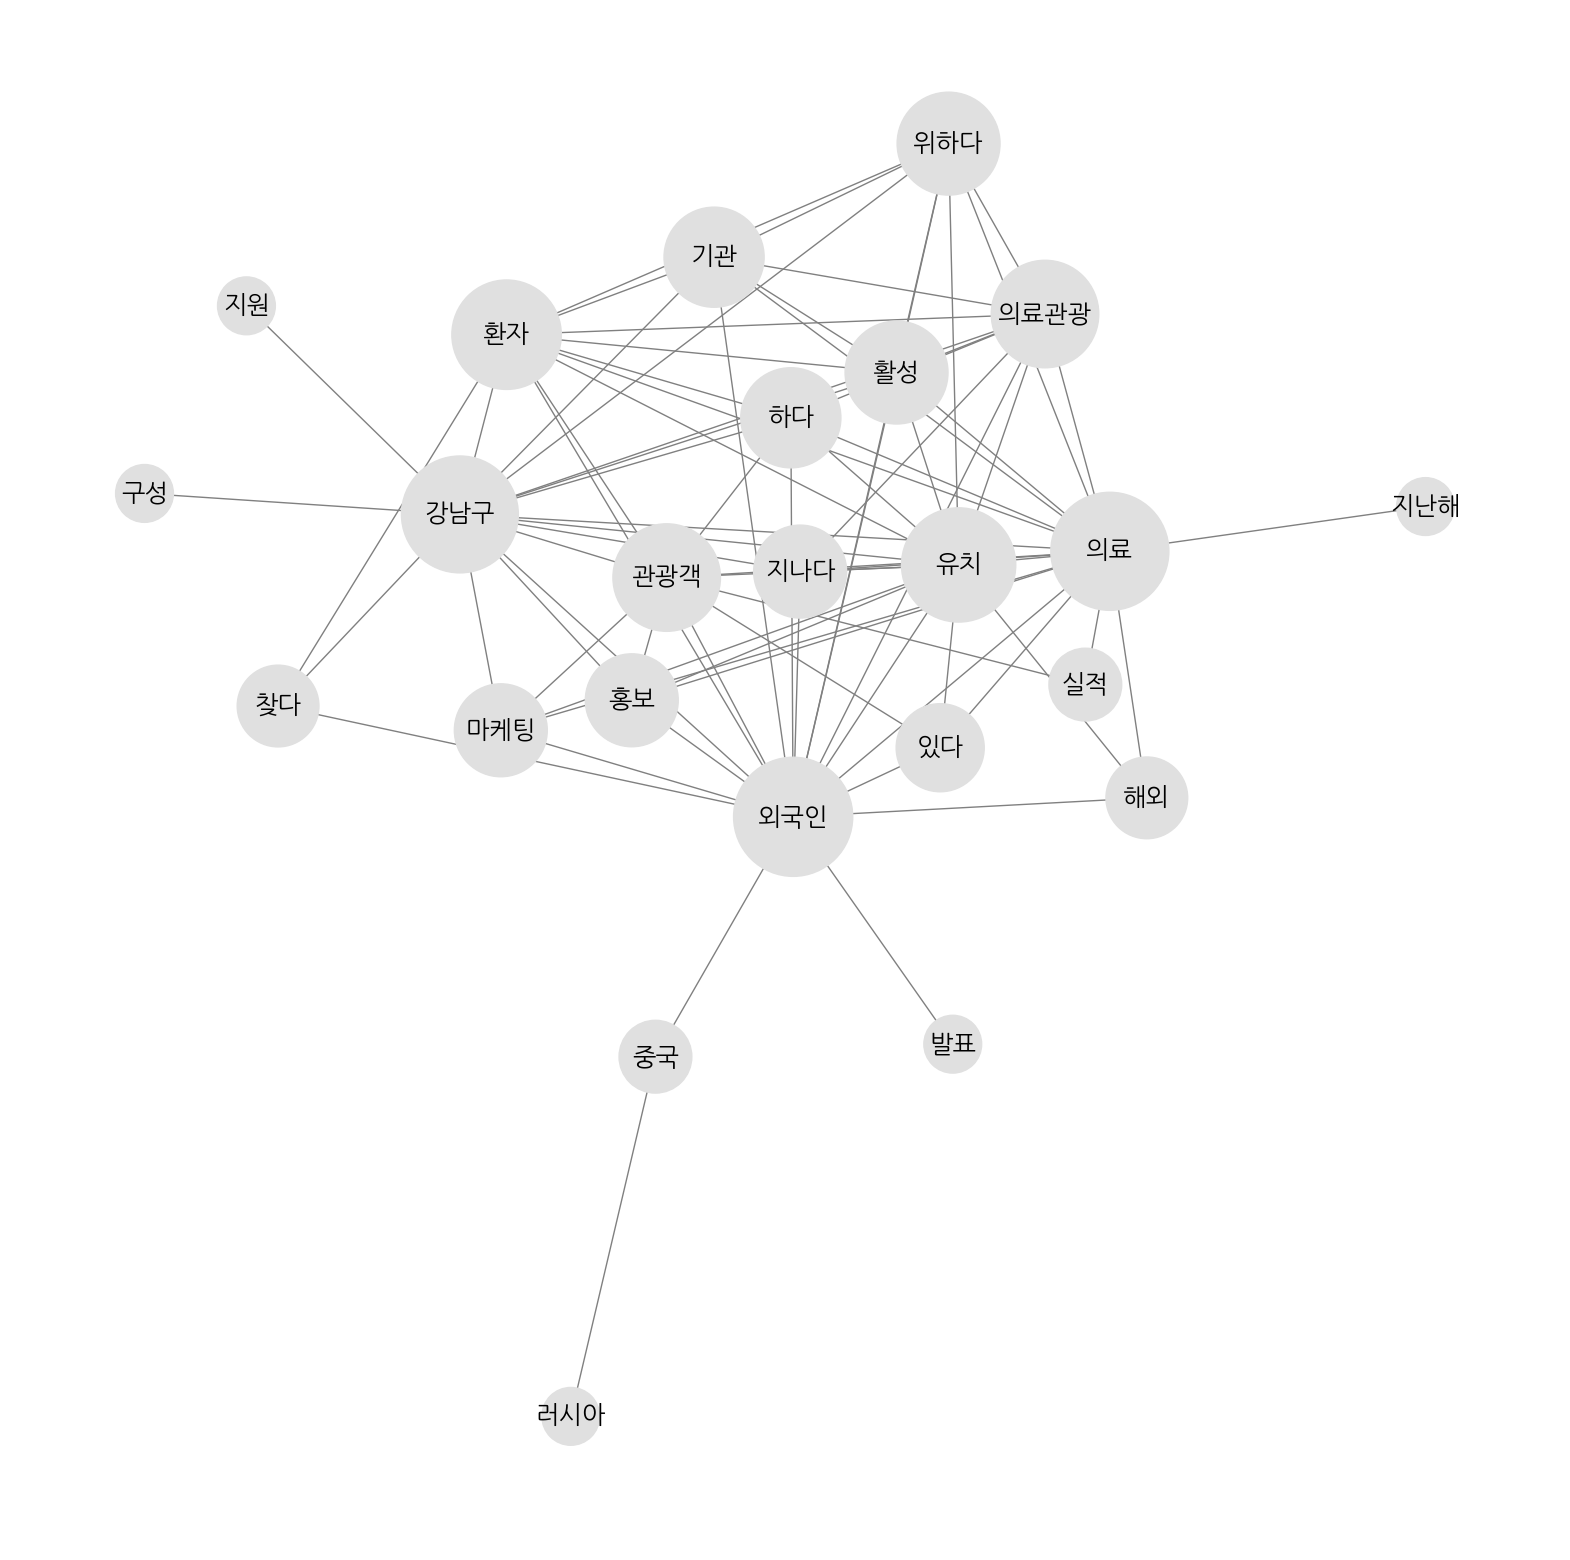

================== 이명박 ==================


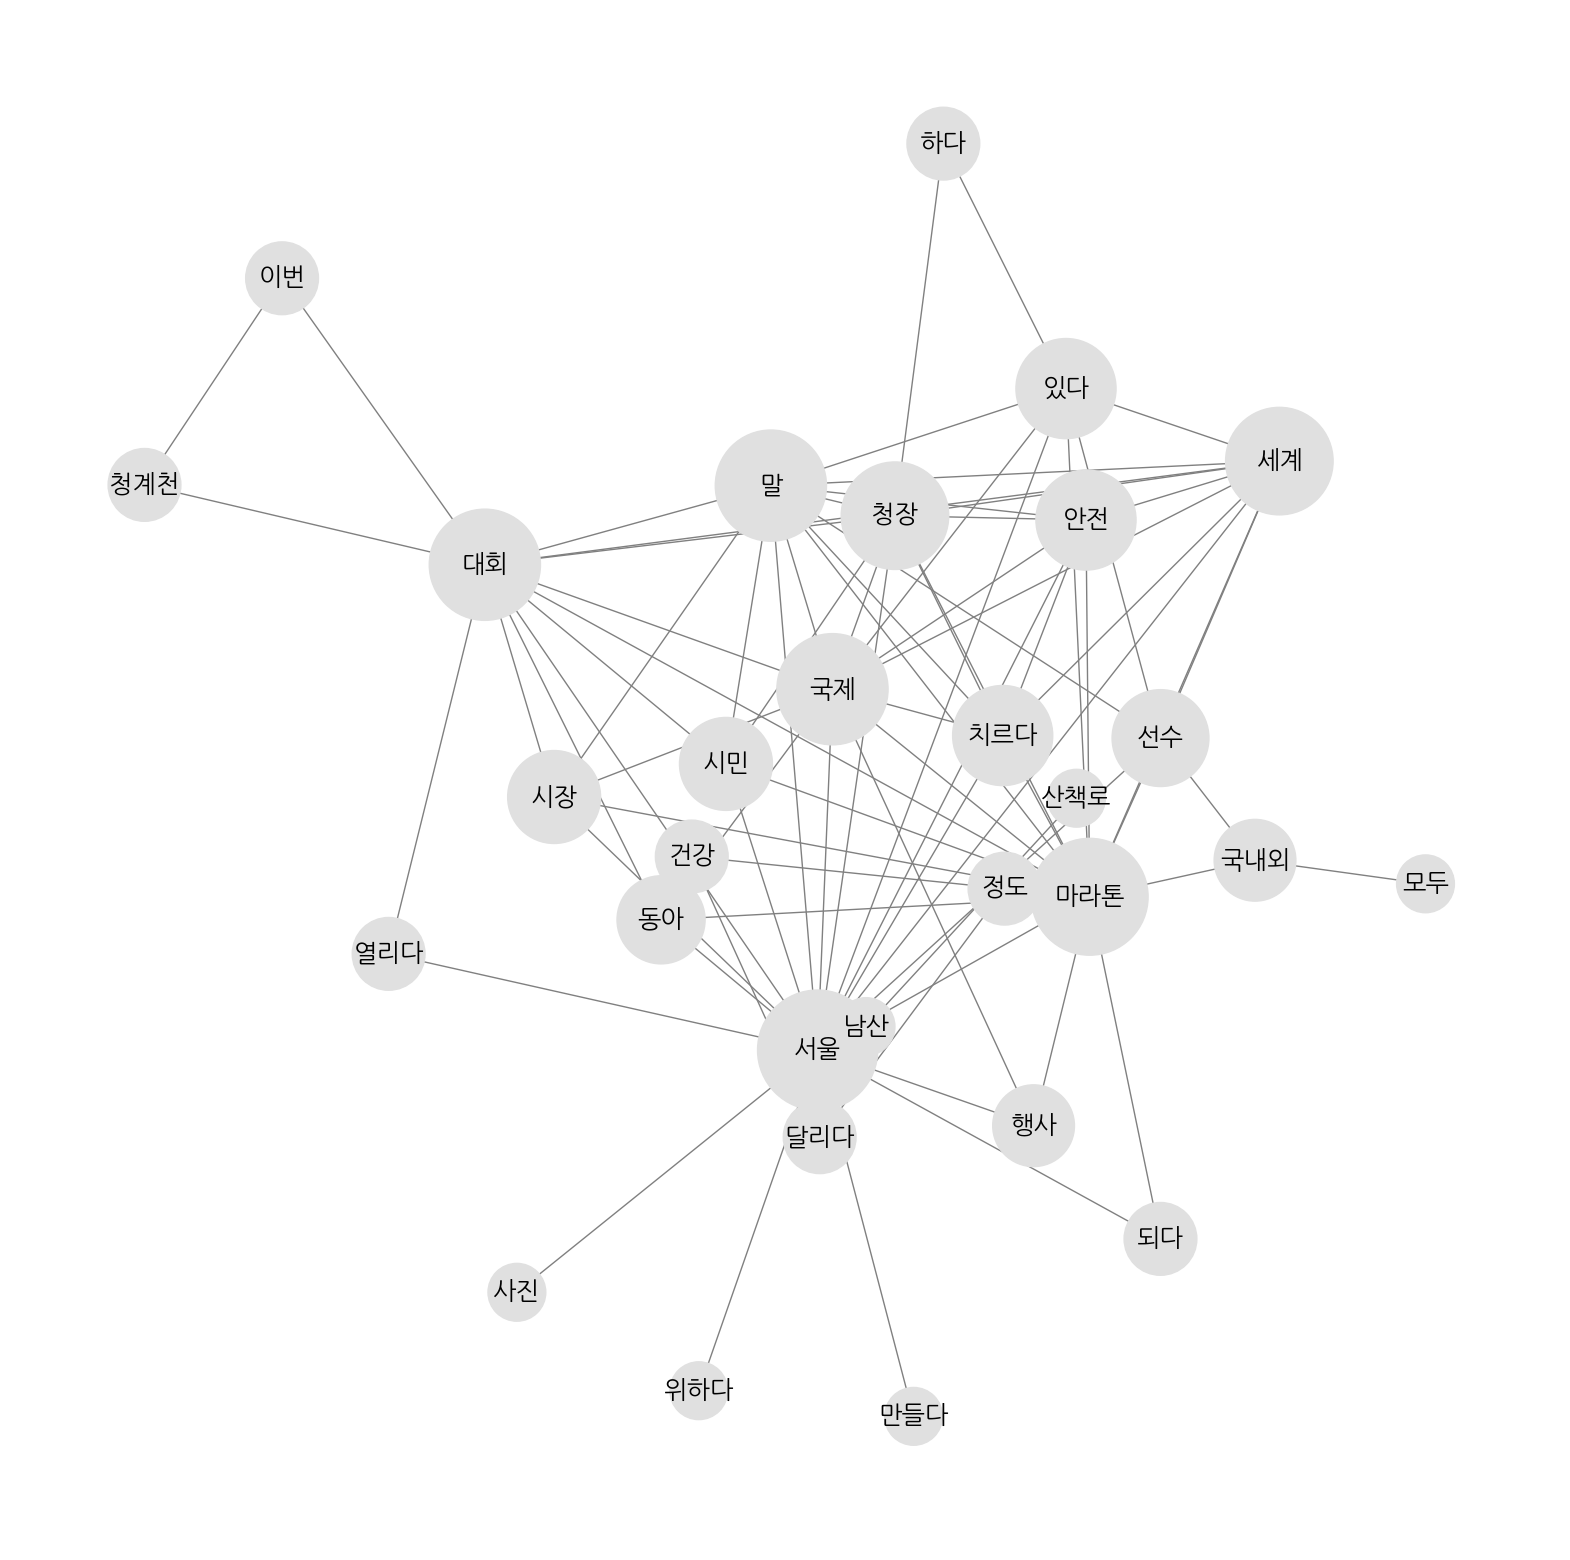

================== 박원순 ==================


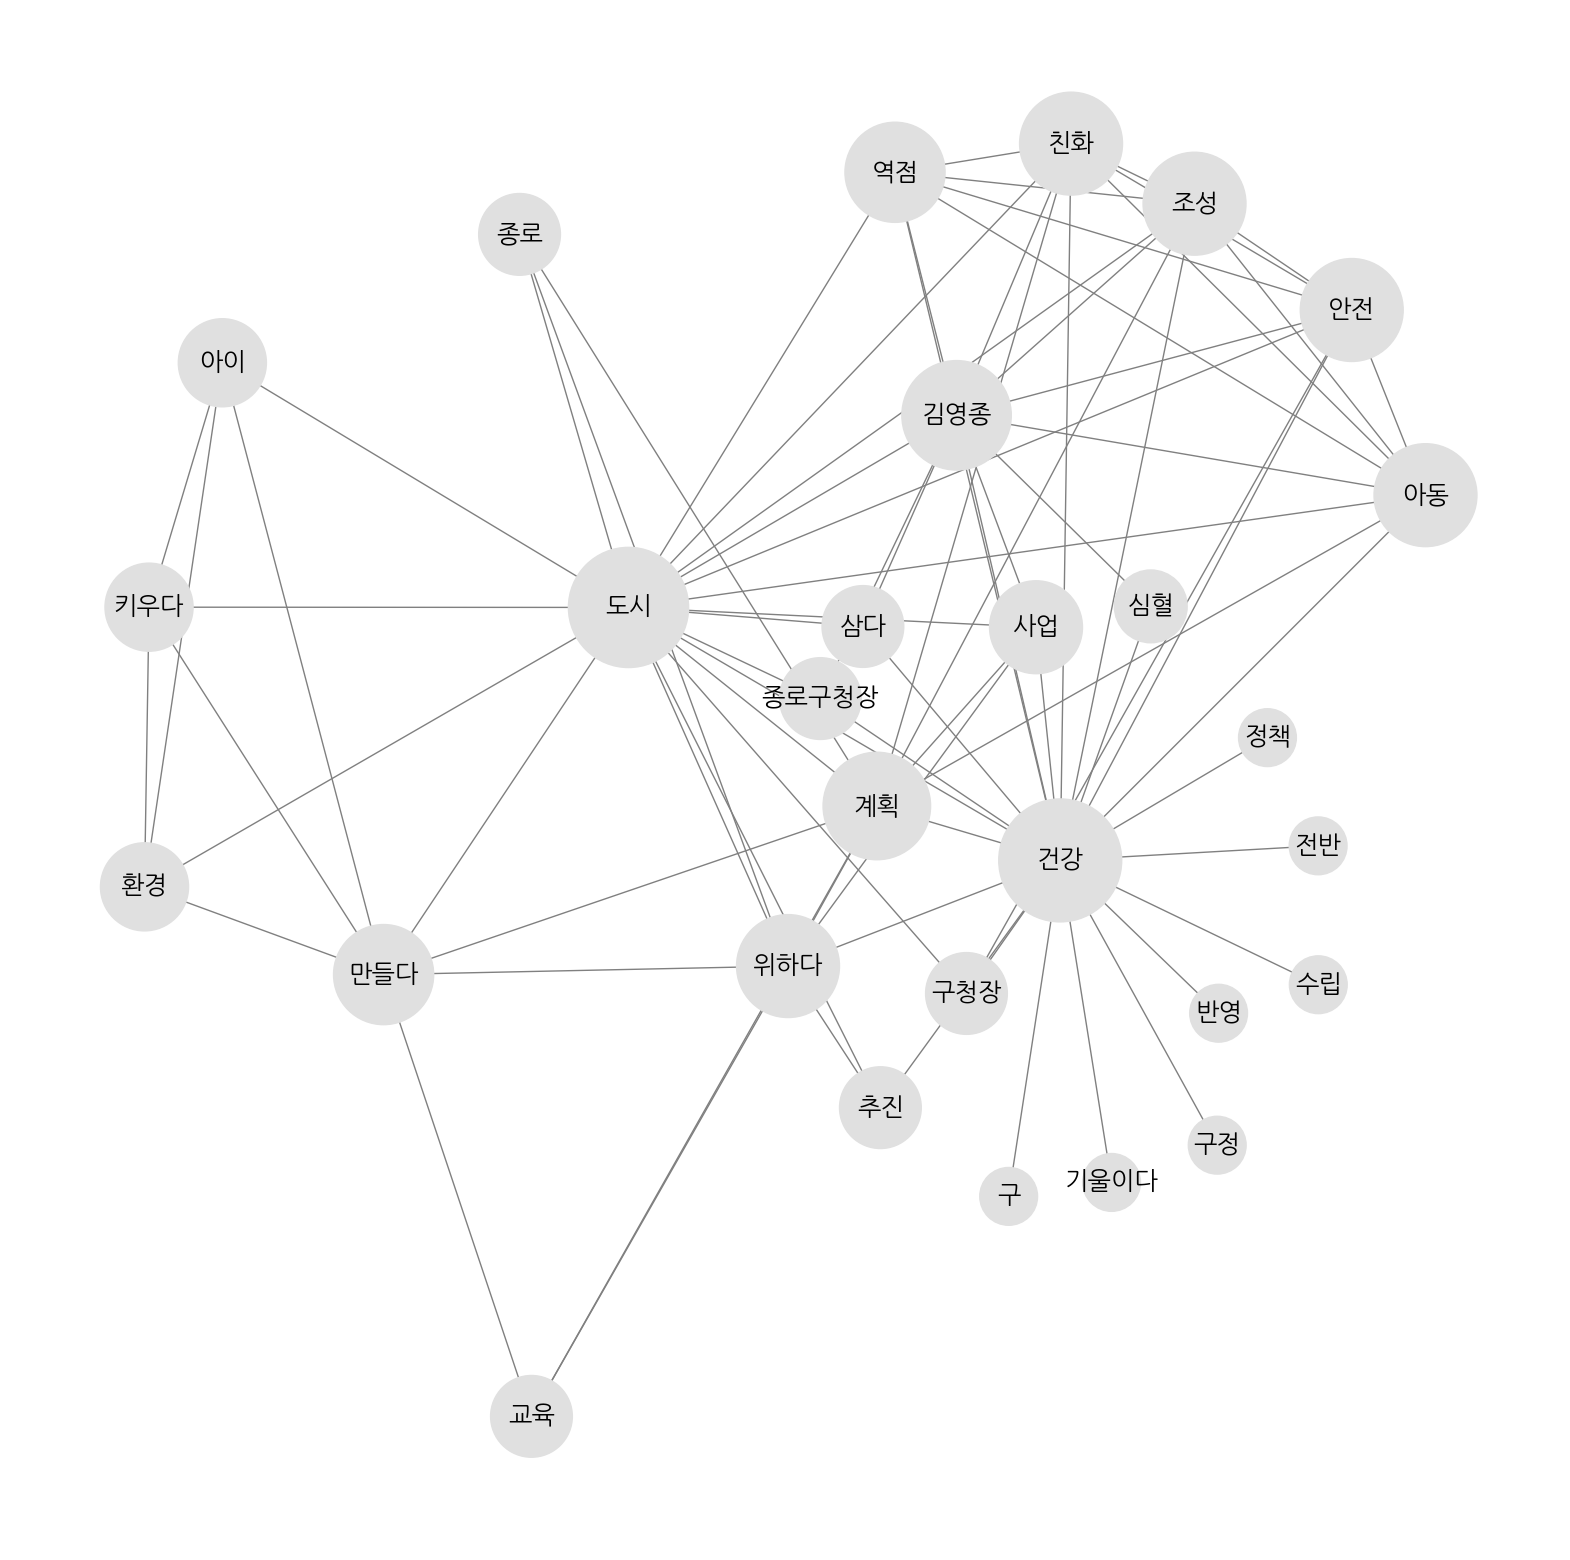

In [17]:
import sys
import math
import networkx as nx
import matplotlib.pyplot as plt

# warnings 안보이게 해줌
import warnings
import matplotlib.cbook
import matplotlib.font_manager as fm

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

NODE_NUM = 80

general_networks = {}
for mayor in MAYORS:
    print("================== {} ==================".format(mayor))
    G = nx.Graph()

    for word_l, word_r, count in cooccurance_list[mayor][:NODE_NUM]:
        G.add_edge(word_l, word_r, weight=count)

    general_networks[mayor] = G

    sizes = [math.log(G.degree(n) + 1) * 2500 for n in G.nodes()]
    plt.figure(figsize = (20, 20))

    nx.draw_networkx(G,
                    pos = nx.kamada_kawai_layout(G, scale=1),
                    node_size = sizes,
                     node_color = '#e0e0e0',
                     edge_color = 'grey',
                     font_family=fontprop.get_name(),
                     #label_pos = 0.5, # [0 - 1], Head to Tail
                     with_labels = True,
                     font_size = 18
                    )

    plt.axis("off")
    plt.show()